In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def rgb_select(img):
    # 1) Convert to YUV color space
    rgb = img
    R_rgb = rgb[:,:,0]
    G_rgb = rgb[:,:,1]
    B_rgb = rgb[:,:,2]
    
    return rgb, R_rgb, G_rgb, B_rgb

In [3]:
def hls_select(img):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    H_hls = hls[:,:,0]
    L_hls = hls[:,:,1]
    S_hls = hls[:,:,2]

    #binary_output = np.zeros_like(S)
    #binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    return hls, H_hls, L_hls, S_hls

In [4]:
def hsv_select(img):
    # 1) Convert to YUV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    H_hsv = hsv[:,:,0]
    S_hsv = hsv[:,:,1]
    V_hsv = hsv[:,:,2]
    
    return hsv, H_hsv, S_hsv, V_hsv

In [5]:
def yuv_select(img):
    # 1) Convert to YUV color space
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    Y_yuv = yuv[:,:,0]
    U_yuv = yuv[:,:,1]
    V_yuv = yuv[:,:,2]

    return yuv, Y_yuv, U_yuv, V_yuv

In [6]:
def lab_select(img):
    # 1) Convert to YUV color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    L_lab = lab[:,:,0]
    A_lab = lab[:,:,1]
    B_lab = lab[:,:,2]

    return lab, L_lab, A_lab, B_lab

In [7]:
def luv_select(img):
    # 1) Convert to YUV color space
    luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    L_luv = luv[:,:,0]
    U_luv = luv[:,:,1]
    V_luv = luv[:,:,2]

    return luv, L_luv, U_luv, V_luv

=== Visualization ===

In [8]:
# Test the color space transform on the most difficult image : "test5.jpg"

def visu_color_space(img_color_space, image=""):

    rgb, R_rgb, G_rgb, B_rgb = rgb_select(img_color_space)
    hls, H_hls, L_hls, S_hls = hls_select(img_color_space)
    hsv, H_hsv, S_hsv, V_hsv = hsv_select(img_color_space)
    yuv, Y_yuv, U_yuv, V_yuv = yuv_select(img_color_space)
    lab, L_lab, A_lab, B_lab = lab_select(img_color_space)
    luv, L_luv, U_luv, V_luv = luv_select(img_color_space)

    fig, axs = plt.subplots(6,3, figsize=(16, 12))
    fig.subplots_adjust(hspace = .2, wspace=0)
    #fig.tight_layout()
    axs = axs.ravel()

    axs[0].imshow(R_rgb, cmap='gray')
    axs[0].set_title('RGB - R channel', fontsize=20)
    axs[1].imshow(G_rgb, cmap='gray')
    axs[1].set_title('RGB - G Channel', fontsize=20)
    axs[2].imshow(B_rgb, cmap='gray')
    axs[2].set_title('RGB - B channel', fontsize=20)

    axs[3].imshow(H_hls, cmap='gray')
    axs[3].set_title('HLS - H Channel', fontsize=20)
    axs[4].imshow(L_hls, cmap='gray')
    axs[4].set_title('HLS - L channel', fontsize=20)
    axs[5].imshow(S_hls, cmap='gray')
    axs[5].set_title('HLS - S Channel', fontsize=20)

    axs[6].imshow(H_hsv, cmap='gray')
    axs[6].set_title('HSV - H Channel', fontsize=20)
    axs[7].imshow(S_hsv, cmap='gray')
    axs[7].set_title('HSV - S channel', fontsize=20)
    axs[8].imshow(V_hsv, cmap='gray')
    axs[8].set_title('HSV - V Channel', fontsize=20)

    axs[9].imshow(Y_yuv, cmap='gray')
    axs[9].set_title('YUV - Y channel', fontsize=20)
    axs[10].imshow(U_yuv, cmap='gray')
    axs[10].set_title('YUV - U Channel', fontsize=20)
    axs[11].imshow(V_yuv, cmap='gray')
    axs[11].set_title('YUV - V Channel', fontsize=20)

    axs[12].imshow(L_lab, cmap='gray')
    axs[12].set_title('LAB - L channel', fontsize=20)
    axs[13].imshow(A_lab, cmap='gray')
    axs[13].set_title('LAB - A Channel', fontsize=20)
    axs[14].imshow(B_lab, cmap='gray')
    axs[14].set_title('LAB - B Channel', fontsize=20)
    
    axs[15].imshow(L_luv, cmap='gray')
    axs[15].set_title('LUV - L channel', fontsize=20)
    axs[16].imshow(U_luv, cmap='gray')
    axs[16].set_title('LUV - U Channel', fontsize=20)
    axs[17].imshow(V_luv, cmap='gray')
    axs[17].set_title('LUV - V Channel', fontsize=20)
    plt.subplots_adjust(hspace = 0.5, wspace=0.001)
    #print('Color space transform on original image', fontsize = 20)
    
    print(image)
    
    return None

Image test 1


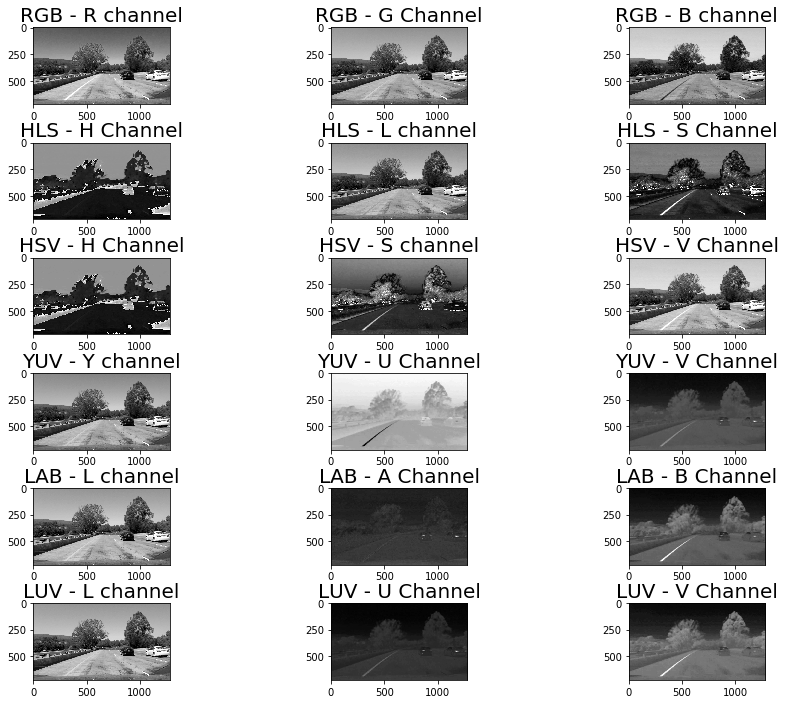

In [9]:
image_visu1 = mpimg.imread('C:/Udacity/CarND-Vehicle-Detection-master/test_images/test1.jpg')
visu_color_space(image_visu1, image="Image test 1")

Image test 5


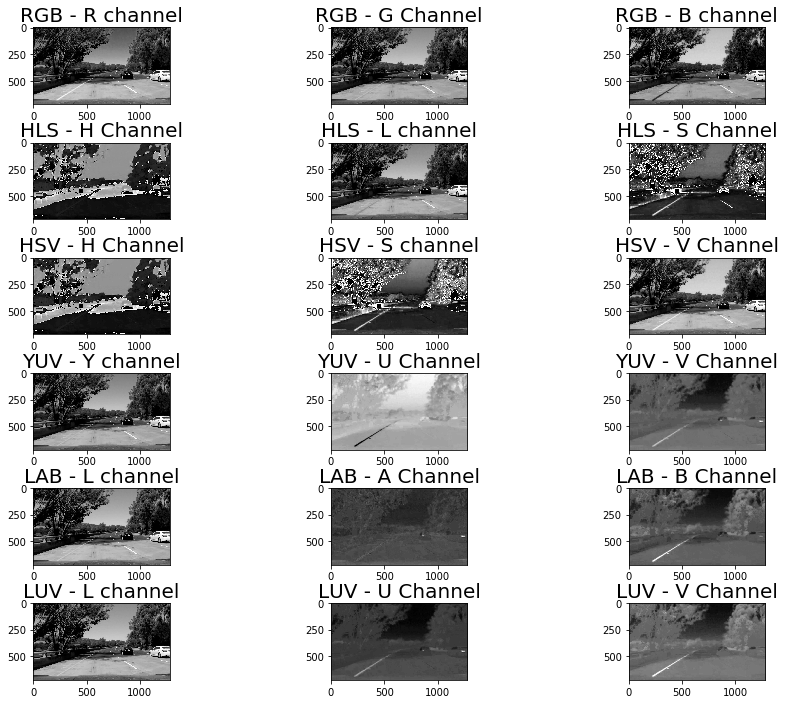

In [10]:
image_visu2 = mpimg.imread('C:/Udacity/CarND-Vehicle-Detection-master/test_images/test5.jpg')
visu_color_space(image_visu2, image="Image test 5")

In [11]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [12]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Text(0.5,1,'HOG image with 8 pixels per cell')

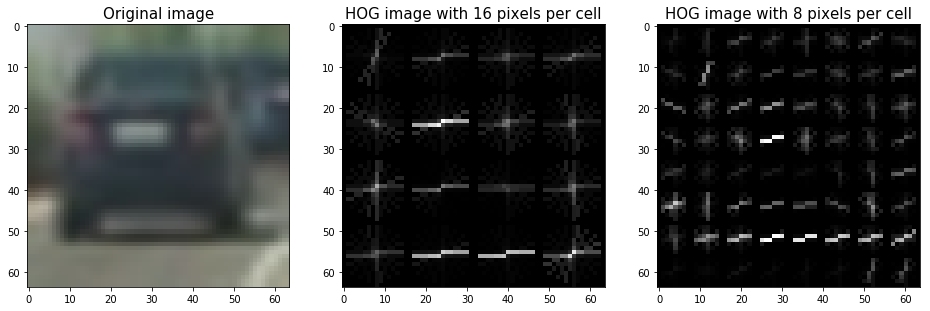

In [13]:
image_hog_original = mpimg.imread('C:/Udacity/CarND-Vehicle-Detection-master/vehicles/vehicles/GTI_Far/image0000.png')

image_hog = cv2.cvtColor(image_hog_original, cv2.COLOR_RGB2YUV)

image_hog_result_16 = get_hog_features(image_hog[:,:,0], 11, 16, 2, 
                        vis=True, feature_vec=True)[1]

image_hog_result_8 = get_hog_features(image_hog[:,:,0], 11, 8, 2, 
                        vis=True, feature_vec=True)[1]

fig, axs = plt.subplots(1,3, figsize=(16, 12))

axs[0].imshow(image_hog_original)
axs[0].set_title('Original image', fontsize=15)
axs[1].imshow(image_hog_result_16, cmap='gray')
axs[1].set_title('HOG image with 16 pixels per cell', fontsize=15)
axs[2].imshow(image_hog_result_8, cmap='gray')
axs[2].set_title('HOG image with 8 pixels per cell', fontsize=15)

In [14]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

In [15]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [16]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop = (0, x_start_stop[1])
    if x_start_stop[1] == None:
        x_start_stop = (x_start_stop[0], img.shape[1])
    if y_start_stop[0] == None:
        y_start_stop = (0, y_start_stop[1])
    if y_start_stop[1] == None:
        y_start_stop = (y_start_stop[0], img.shape[0])
        
    #if x_start_stop[0] == None:
        #if x_start_stop[1] == None:
            #x_start_stop = (0, img.shape[1])
    #if y_start_stop[0] == None:
        #if y_start_stop[1] == None:
            #y_start_stop = (0, img.shape[0])
        
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

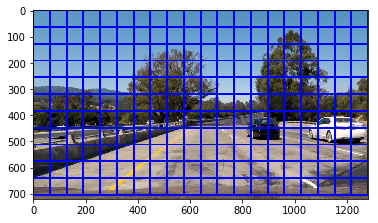

In [17]:
image = mpimg.imread('C:/Udacity/CarND-Vehicle-Detection-master/test_images/test1.jpg')

windows = slide_window(image, x_start_stop=(None, None), y_start_stop=(None, None), 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)

plt.imshow(window_img)

In [18]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        #image = mpimg.imread(file)
        #image = image * 255
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
            elif color_space == 'LAB':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        else: feature_image = np.copy(image)      
        #print(feature_image)
        
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            #print(spatial_features)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            #print(hist_features)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [19]:
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        elif color_space == 'LAB':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    else: feature_image = np.copy(img)  
    #print(feature_image)
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [20]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #print(img)
    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))   
        #print(test_img)
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

In [21]:
# Read in cars and notcars
images_car = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/vehicles/vehicles/KITTI_extracted/*.png')
images_notcar = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/non-vehicles/non-vehicles/Extras/extra*.png')

images_car_GTI_Right = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/vehicles/vehicles/GTI_Right/image*.png')
images_car_GTI_Left = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/vehicles/vehicles/GTI_Left/image*.png')
images_car_GTI_MiddleClose = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/vehicles/vehicles/GTI_MiddleClose/image*.png')
images_car_GTI_Far = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/vehicles/vehicles/GTI_Far/image*.png')
images_notcar_GTI = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/non-vehicles/non-vehicles/GTI/image*.png')
cars = []
notcars = []

for image_car in images_car_GTI_Right:
    cars.append(image_car)
    
for image_car in images_car_GTI_Left:
    cars.append(image_car)
    
for image_car in images_car_GTI_MiddleClose:
    cars.append(image_car)
    
for image_car in images_car_GTI_Far:
    cars.append(image_car)
    
np.random.shuffle(cars)
    
for image_car in images_car:
    cars.append(image_car)
    
np.random.shuffle(cars)


for image_notcar in images_notcar_GTI:
    notcars.append(image_notcar)
    
np.random.shuffle(notcars)
    
for image_notcar in images_notcar:
    notcars.append(image_notcar)
    
np.random.shuffle(notcars)

print("Number of 'cars' images : ", len(cars))    
print("Number of 'not cars' images : ", len(notcars))

Number of 'cars' images :  8792
Number of 'not cars' images :  8968


[360, 720]


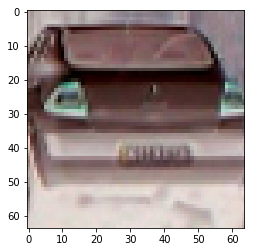

In [22]:
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
#sample_size = 500
#cars = cars[0:sample_size]
#notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations //11
pix_per_cell = 8 # HOG pixels per cell //16
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions 16x16
hist_bins = 32    # Number of histogram bins  64
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

image = mpimg.imread(cars[0])*255
plt.imshow(image)
y_start_stop = [int(720/2), 720] # Min and max in y to search in slide_window()
ystart = y_start_stop[0]
ystop = y_start_stop[1]
print(y_start_stop)

In [23]:
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


=== Normalize the data ===
=============

In [24]:
X = np.vstack((car_features, notcar_features)).astype(np.float64)
print(X.shape)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

(17760, 9636)


=== Train the classifier ===
==============

In [25]:
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

# Use a linear SVC 
svc = LinearSVC()

svc.fit(X_train, y_train)

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.
Test Accuracy of SVC =  0.9949


In [26]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, spatial_size, 
               hist_bins, plot_rect=False, hog_channel=0, spatial_feat=True, hist_feat=True, hog_feat=True):
    
    
    draw_img = np.copy(img)
    #img = img.astype(np.float32)
    
    rects = []
    
    img_tosearch = img[ystart:ystop,:,:]
    
    if color_space != 'RGB':
        if color_space == 'HSV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
        elif color_space == 'LAB':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LAB)
    else: ctrans_tosearch = np.copy(img_tosearch)
    #print(ctrans_tosearch)
    
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            
            img_features = []

            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
            
            # Get color features
            #3) Compute spatial features if flag is set
            if spatial_feat == True:
                spatial_features = bin_spatial(subimg, size=spatial_size)
                img_features.append(spatial_features)  
            
            if hist_feat == True:
                hist_features = color_hist(subimg, nbins=hist_bins)
                img_features.append(hist_features)
            
            # Extract HOG for this patch
            if hog_feat == True:
                if hog_channel == 'ALL':
                    #hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    #hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    #hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    #hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
                    
                    hog_features = []
                    hog_features.append(hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window])
                    hog_features.append(hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window])
                    hog_features.append(hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window])
                    hog_features = np.ravel(hog_features)
                if hog_channel == 0:
                    hog_features = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
                if hog_channel == 1:
                    hog_features = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()   
                if hog_channel == 2:
                    hog_features = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                
                img_features.append(hog_features)
            

            features = np.concatenate(img_features)
            test_features = X_scaler.transform(np.array(features).reshape(1, -1))
            
            # Scale features and make a prediction 
            test_prediction = svc.predict(test_features)

            if test_prediction == 1 or plot_rect == True:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                rects.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return draw_img, rects

In [27]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

=== Pipeline ===
=========

Cars detection with multi-scale windows - Showed principle in the next two cells

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


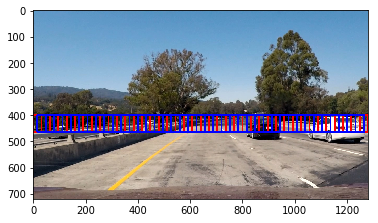

In [28]:
image_show = mpimg.imread('C:/Udacity/CarND-Vehicle-Detection-master/test_images/test1.jpg')

ystart = 400
ystop = 464
scale = 1

rect_img, rects = find_cars(image_show, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
            spatial_size, hist_bins, plot_rect=True, hog_channel="ALL", spatial_feat=True, hist_feat=True, hog_feat=True)

rect_1 = []
rect_2 = []
i = 1

for rect in rects:
    if i%2:
        rect_1.append(rect)
    else:
        rect_2.append(rect)
    i += 1
    
rect_img_draw = draw_boxes(image_show, rect_1, color=(255, 0, 0), thick=6)
rect_img_draw = draw_boxes(rect_img_draw, rect_2, color=(0, 0, 255), thick=6)
plt.imshow(rect_img_draw)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


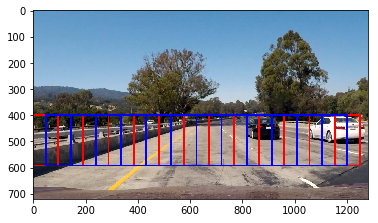

In [29]:
ystart = 400
ystop = 596
scale = 3

rect_img, rects = find_cars(image_show, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
            spatial_size, hist_bins, plot_rect=True, hog_channel="ALL", spatial_feat=True, hist_feat=True, hog_feat=True)

rect_1 = []
rect_2 = []
i = 1

for rect in rects:
    if i%2:
        rect_1.append(rect)
    else:
        rect_2.append(rect)
    i += 1

rect_img_draw = draw_boxes(image_show, rect_1, color=(255, 0, 0), thick=6)
rect_img_draw = draw_boxes(rect_img_draw, rect_2, color=(0, 0, 255), thick=6)
plt.imshow(rect_img_draw)

In [30]:
def pipeline(image, video_make=False):
    """
    Cars detection pipeline
    """
    
    rectangles = []
    draw_rect = []
    
    hog_channel_cond = "ALL"
    plot_rect_cond = False
    spatial_feat_cond = True
    hist_feat_cond = True
    hog_feat_cond = True
    
    #draw_image2 = np.copy(image)
    
    #image = image.astype(np.float32)/255
    
    #h = image.shape[0]  
    
    
    ystart = 400
    ystop = 464
    scale = 1.0
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]

    image_rect = draw_boxes(image, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
    
    ystart = 416
    ystop = 480
    scale = 1.0
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]
    image_rect = draw_boxes(image_rect, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
            
    ystart = 400
    ystop = 496
    scale = 1.5
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]
    image_rect = draw_boxes(image_rect, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
    
    ystart = 432
    ystop = 528
    scale = 1.5
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]
    image_rect = draw_boxes(image_rect, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
    
    ystart = 400
    ystop = 528
    scale = 2.0
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]
    image_rect = draw_boxes(image_rect, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
    
    ystart = 432
    ystop = 560
    scale = 2.0
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]
    image_rect = draw_boxes(image_rect, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
    
    ystart = 400
    ystop = 596
    scale = 3.5
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]
    image_rect = draw_boxes(image_rect, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
    
    ystart = 464
    ystop = 660
    scale = 3.5
    rect_image = find_cars(image, ystart, ystop, scale, svc, X_scaler, color_space, orient, pix_per_cell, cell_per_block, 
                                spatial_size, hist_bins, plot_rect=plot_rect_cond, hog_channel=hog_channel_cond, 
                                    spatial_feat=spatial_feat_cond, hist_feat=hist_feat_cond, hog_feat=hog_feat_cond)[1]
    image_rect = draw_boxes(image_rect, rect_image, color=(255, 0, 0), thick=6)
    rectangles.append(rect_image)
    
    

    for rectangle in rectangles:
        for rectangle_only in rectangle:
            draw_rect.append(rectangle_only)
            
    # Allow to use function to make video ("video_make == True") or to test function on "test images" and "test_video" 
    #("video_make == False")     
    if video_make == True:
        store_detect.store_rects(draw_rect)
            
        # Add heat to each box in box list
        heat_img = np.zeros_like(image[:,:,0])
        for rect in store_detect.prev_detect:
            heat_img = add_heat(heat_img, rect)
            
        # Apply threshold to help remove false positives
        heat_img = apply_threshold(heat_img, 1 + len(store_detect.prev_detect)//2)
        #heat_img = apply_threshold(heat_img, int(2/3(len(store_detect.prev_detect)//2)))
    
        # Find final boxes from heatmap using label function
        labels = label(heat_img)
        draw_img = draw_labeled_bboxes(np.copy(image), labels)

    else:
        # Add heat to each box in box list
        heat = add_heat(np.zeros_like(image[:,:,0]),draw_rect)
    
        # Apply threshold to help remove false positives
        heat = apply_threshold(heat, 1)

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return image_rect, draw_img

=== Test images ===
==========

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Text(0.5,1,'Image test 6 - Result detection cars')

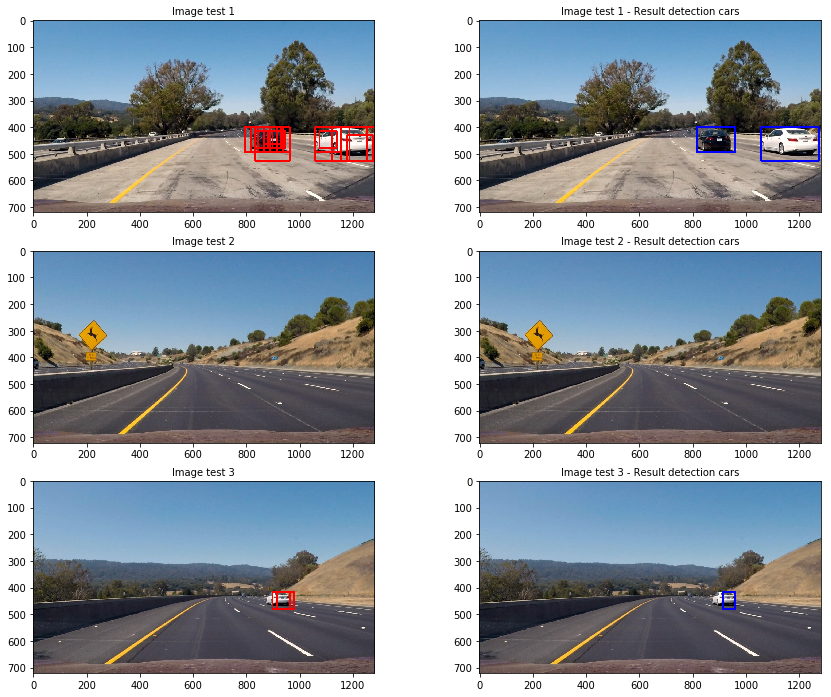

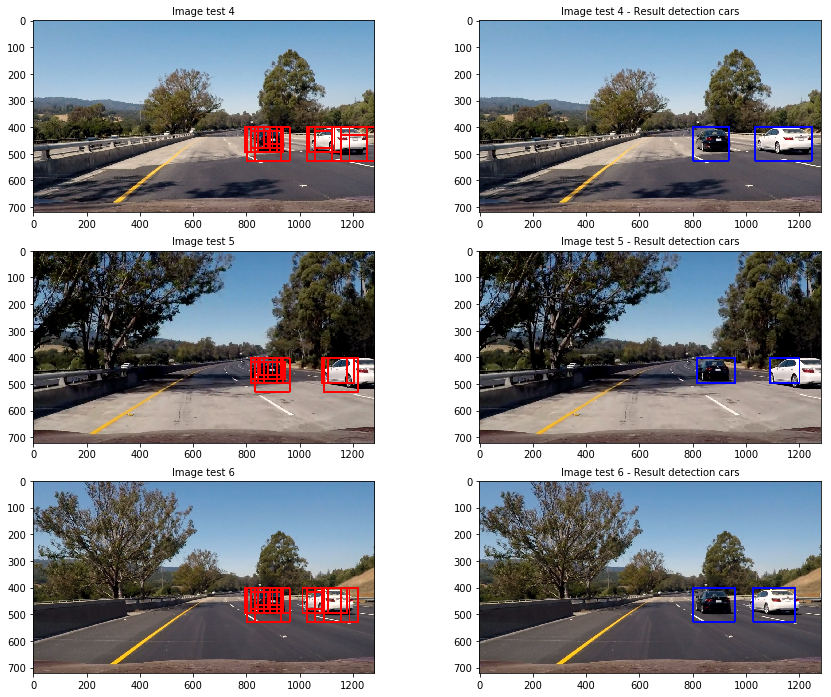

In [31]:
images_test = glob.glob('C:/Udacity/CarND-Vehicle-Detection-master/test_images/test*.jpg')

plot_image = []
plot_heat_image = []
    
for fname in images_test:
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #print(image)
    #image = image/255
    image_rect, draw_img = pipeline(image)
    plot_image.append(image_rect)
    plot_heat_image.append(draw_img)

    
fig, axs = plt.subplots(3,2, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=0)
#fig.tight_layout()
axs = axs.ravel()

axs[0].imshow(plot_image[0])
axs[0].set_title('Image test 1', fontsize=10)
axs[1].imshow(plot_heat_image[0])
axs[1].set_title('Image test 1 - Result detection cars', fontsize=10)

axs[2].imshow(plot_image[1])
axs[2].set_title('Image test 2', fontsize=10)
axs[3].imshow(plot_heat_image[1])
axs[3].set_title('Image test 2 - Result detection cars', fontsize=10)

axs[4].imshow(plot_image[2])
axs[4].set_title('Image test 3', fontsize=10)
axs[5].imshow(plot_heat_image[2])
axs[5].set_title('Image test 3 - Result detection cars', fontsize=10)

fig, axs = plt.subplots(3,2, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=0)
#fig.tight_layout()
axs = axs.ravel()

axs[0].imshow(plot_image[3])
axs[0].set_title('Image test 4', fontsize=10)
axs[1].imshow(plot_heat_image[3])
axs[1].set_title('Image test 4 - Result detection cars', fontsize=10)

axs[2].imshow(plot_image[4])
axs[2].set_title('Image test 5', fontsize=10)
axs[3].imshow(plot_heat_image[4])
axs[3].set_title('Image test 5 - Result detection cars', fontsize=10)

axs[4].imshow(plot_image[5])
axs[4].set_title('Image test 6', fontsize=10)
axs[5].imshow(plot_heat_image[5])
axs[5].set_title('Image test 6 - Result detection cars', fontsize=10)

=== Test video ===
==========

In [32]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [33]:
def process_image(image):
    
    return pipeline(image, video_make=False)[1]

In [35]:
test_video_output = 'test_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
test_video_input = VideoFileClip("test_video.mp4")
test_video_generate = test_video_input.fl_image(process_image) #NOTE: this function expects color images!!
%time test_video_generate.write_videofile(test_video_output, audio=False)

[MoviePy] >>>> Building video test_video_output.mp4
[MoviePy] Writing video test_video_output.mp4


 97%|████████████████████████████████████████▉ | 38/39 [00:40<00:01,  1.02s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output.mp4 

Wall time: 42.4 s


In [36]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_video_output))

=== Smoothed vehicles detection ===
=========

In [37]:
# Class which allows to store previous detect vehicles
class store_prev_detect():
    def __init__(self):
        # history of rectangles previous n frames
        self.prev_detect = [] 
        
    def store_rects(self, rects):
        self.prev_detect.append(rects)
        if len(self.prev_detect) > 30:
            self.prev_detect = self.prev_detect[len(self.prev_detect)-30:]
            
            #rect/rect_image...

=== Video Pipeline ===
============

In [38]:
def process_image(image):
    
    return pipeline(image, video_make=True)[1]

In [39]:
store_detect = store_prev_detect()

video_output = 'project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
video_input = VideoFileClip("project_video.mp4")
video_generate = video_input.fl_image(process_image) #NOTE: this function expects color images!!
%time video_generate.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████▉| 1260/1261 [21:24<00:01,  1.01s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 21min 25s


In [40]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))